# INVESTIGATION OF CRIMES
#### DATA MINING PROJECT

#### NAME => Vikas Bhagure

### IMPORTING DATASETS

**Contents**
1. [Importing Libraries And Loading Datasets](#1)
1. [Exploratory Data Analysis (EDA)](#2)
1. [Data Visualization](#3)
1. [Data Visualization for records of district](#4)
1. [Data Visualization for records of state](#5)
1. [KNN Classification](#6)
1. [Conclusion](#7)

<a id="1"></a> <br>
# 1. Importing Libraries And Reading CSV Files

#### Import all required python libraries that will be used for exploratory data analysis and data visualization and classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

**ABBREVIATION**

1. cbd stands for Crime by District
2. cbs stands for Crime by State

In [5]:
cbd = pd.read_csv("crime_by_district_rt.csv")
cbs = pd.read_csv("crime_by_state_rt.csv")

<a id="2"></a> <br>
# 2. Exploratory Data Analysis (EDA)

#### The shape attribute of the data frame can be used to know the size of the data frame.

In [6]:
cbd.shape,cbs.shape

((9385, 13), (420, 12))

#### How many district and states ?

In [7]:
len(list(cbd["DISTRICT"].unique())),len(list(cbs["STATE/UT"].unique()))

(831, 35)

#### What are the column names of this dataset?¶

In [8]:
list(cbd.columns),list(cbs.columns)

(['STATE/UT',
  'DISTRICT',
  'Year',
  'Murder',
  'Assault on women',
  'Kidnapping and Abduction',
  'Dacoity',
  'Robbery',
  'Arson',
  'Hurt',
  'Prevention of atrocities (POA) Act',
  'Protection of Civil Rights (PCR) Act',
  'Other Crimes Against SCs'],
 ['STATE/UT',
  'Year',
  'Murder',
  'Assault on women',
  'Kidnapping and Abduction',
  'Dacoity',
  'Robbery',
  'Arson',
  'Hurt',
  'Prevention of atrocities (POA) Act',
  'Protection of Civil Rights (PCR) Act',
  'Other Crimes Against SCs'])

Crimes that are recorded here as fields are the Indian Penal Code crimes.
Each record represents the number of each type of crime that occurred where the victim was registered as a person of a scheduled cast.

This dataset include the following features
1. State
2. District [only for cbd]
3. Year
4. Number of cases of Murder in the state and year
5. Number of cases of Assault on Women in the state and year
6. Number of cases of Kidnapping and Abduction in the state and year
7. Number of cases of Dacoity in the state and year
8. Number of cases of Robbery in the state and year
9. Number of cases of Arson in the state and year
10. Number of cases of Hurt in the state and year
11. Number of cases of Violation of the Prevention of atrocities act in the state and year
12. Number of cases of Violation of the Prevention of civil rights act in the state and year
13. Number other crimes commited where the victim was registered as belonging to a scheduled caste in the state and year

#### Display first 6 records of the data set

In [9]:
cbd.head(6) 

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,0,0,0,0,0,0,0,0,0,0


In [10]:
cbs.head(6) 

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,2001,45,69,22,3,2,6,518,950,312,1006
1,ANDHRA PRADESH,2002,60,98,18,0,4,12,568,830,459,1336
2,ANDHRA PRADESH,2003,33,79,27,1,15,4,615,1234,165,1386
3,ANDHRA PRADESH,2004,39,66,28,0,7,20,474,1319,68,1234
4,ANDHRA PRADESH,2005,37,74,21,0,0,9,459,1244,61,1212
5,ANDHRA PRADESH,2006,52,97,12,3,5,13,657,1514,93,1445


#### Display last 6 records of the data set

In [11]:
cbd.tail(6) 

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
9379,Delhi UT,SOUTH-WEST,2013,0,0,0,0,0,0,0,4,0,4
9380,Delhi UT,STF,2013,0,0,0,0,0,0,0,0,0,0
9381,Delhi UT,WEST,2013,0,0,0,0,0,0,0,3,1,0
9382,Lakshadweep,LAKSHADWEEP,2013,0,0,0,0,0,0,0,0,0,0
9383,Puducherry,KARAIKAL,2013,0,1,0,0,0,0,0,0,3,0
9384,Puducherry,PUDUCHERRY,2013,0,0,0,0,0,0,0,4,12,1


In [12]:
cbs.tail(6) 

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
414,PUDUCHERRY,2007,1,0,0,0,0,0,0,0,24,0
415,PUDUCHERRY,2008,0,0,0,0,0,0,0,2,27,0
416,PUDUCHERRY,2009,0,0,0,0,0,0,0,3,26,0
417,PUDUCHERRY,2010,1,0,1,0,0,0,1,2,26,0
418,PUDUCHERRY,2011,0,0,0,0,0,0,0,1,15,2
419,PUDUCHERRY,2012,2,0,0,0,0,0,0,1,20,1


#### Display a random sample consisting of 5 records

In [13]:
cbd.sample(5)

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
1199,TAMIL NADU,CUDDALORE,2002,2,0,0,0,0,0,10,31,0,19
6972,UTTAR PRADESH,KAUSHAMBI,2010,2,4,1,0,0,0,2,0,0,24
7535,ODISHA,CUTTACK,2011,0,2,0,0,0,2,10,112,0,0
861,HARYANA,SIRSA,2002,3,2,1,0,1,0,9,2,0,8
6621,KARNATAKA,SHIMOGA,2010,0,0,2,1,0,0,12,8,1,40


In [14]:
cbs.sample(5)

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
209,MIZORAM,2006,0,0,0,0,0,0,0,0,0,0
384,DELHI,2001,0,0,0,0,0,0,0,17,2,0
351,CHANDIGARH,2004,0,0,0,0,0,0,0,0,0,0
380,DAMAN & DIU,2009,0,0,0,0,0,0,0,0,0,2
281,TAMIL NADU,2006,26,21,3,0,0,7,136,468,84,246


#### Descriptive statistics of the dataset

In [15]:
cbd.describe()

,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
count,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000,9385.000000
mean,2007.169739,0.913799,1.917102,0.565264,0.046883,0.108151,0.309643,5.759936,14.762387,0.461588,18.805434
std,3.756078,1.950945,3.370164,1.609669,0.309237,0.551603,1.022351,14.567091,31.390084,3.851661,42.657607
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000
75%,2010.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,14.000000,0.000000,18.000000
max,2013.000000,24.000000,38.000000,23.000000,9.000000,14.000000,28.000000,273.000000,428.000000,153.000000,819.000000


In [16]:
cbs.describe()

,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2006.500000,18.809524,37.897619,11.138095,0.940476,2.269048,6.469048,117.033333,296.566667,10.166667,380.219048
std,3.456169,52.543442,79.435608,34.946327,2.703976,6.100314,15.771988,206.612233,636.605911,35.968971,864.165129
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.500000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.500000,8.000000,0.000000,6.000000
75%,2009.250000,14.000000,34.250000,8.000000,0.000000,1.000000,5.000000,148.250000,260.250000,2.000000,280.000000
max,2012.000000,423.000000,412.000000,363.000000,22.000000,83.000000,178.000000,1252.000000,4885.000000,459.000000,4771.000000


#### 'DataFrame'.isnull().sum() is used to show that if there is any Null value present in the DataFrame.

In [17]:
cbd.isnull().sum()

STATE/UT                                0
DISTRICT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [18]:
cbs.isnull().sum()

STATE/UT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

#### **Dropping the "STATE/UT" and "Year" coloumns to calulate some distriptive statistics**

In [19]:
cbs_crimes_only = cbs.copy(deep = True).drop(["STATE/UT", "Year"], axis = 1)

In [20]:
cbd_crimes_only = cbd.copy(deep = True).drop(["STATE/UT","DISTRICT","Year"], axis = 1)

In [21]:
cbd_crimes_only.mean(1).head()

0     5.5
1    12.7
2    11.4
3    10.0
4     8.9
dtype: float64

In [22]:
cbs_crimes_only.mean(1).head()

0    293.3
1    338.5
2    355.9
3    325.5
4    311.7
dtype: float64

<a id="3"></a> <br>
# 3. Data Visualization

#### Create a copy of the dataset and drop the "Year" column
#### Creating a list for storing all the col having numerical values

In [23]:
# numerical cols
crime_cols = ['Murder', 'Assault on women', 'Kidnapping and Abduction', 'Dacoity',
              'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act',
              'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

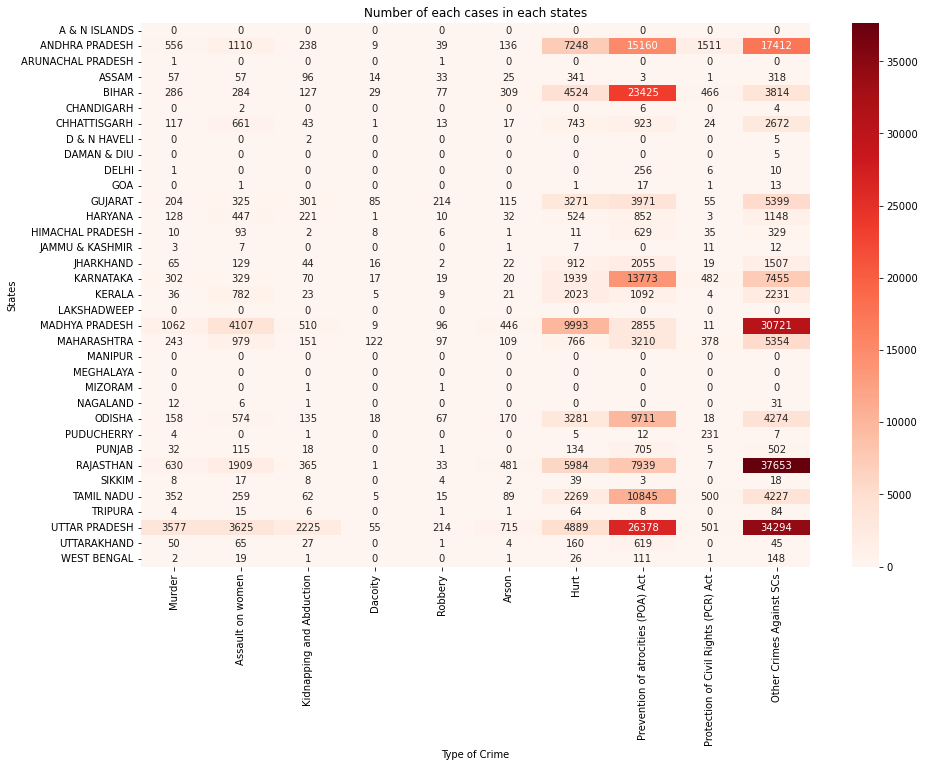

In [24]:
plt.figure(figsize=(15, 10))
cbs_pivot = cbs.groupby('STATE/UT')[crime_cols].sum()
sns.heatmap(cbs_pivot, annot=True, fmt='.0f', cmap='Reds')
plt.title('Number of each cases in each states')
plt.xlabel('Type of Crime')
plt.ylabel('States')
plt.show()

#### Each type of crime commited every year by states

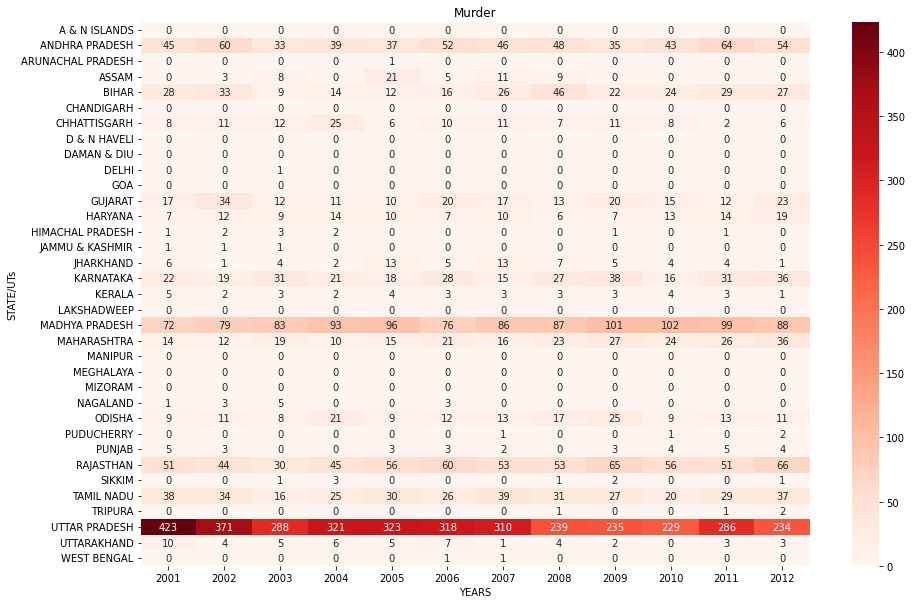

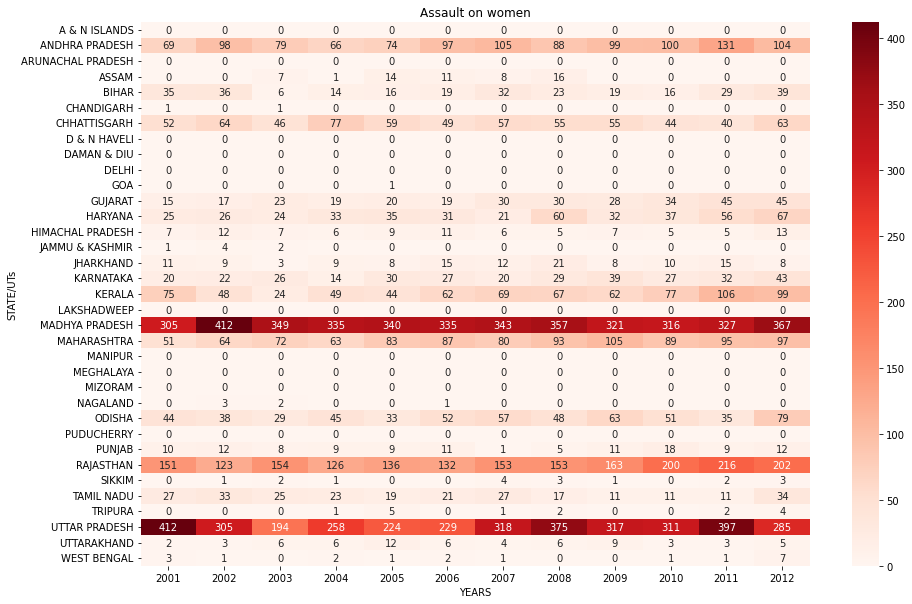

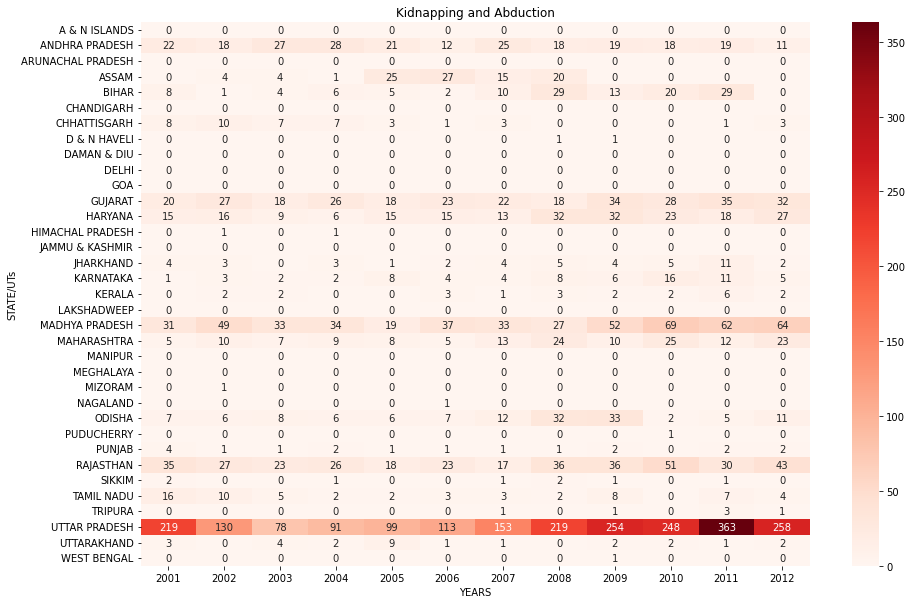

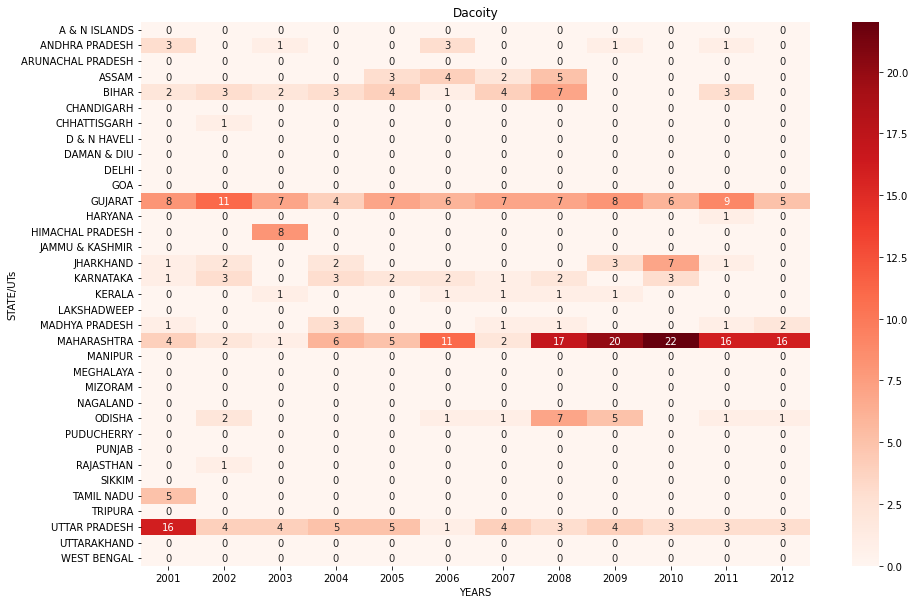

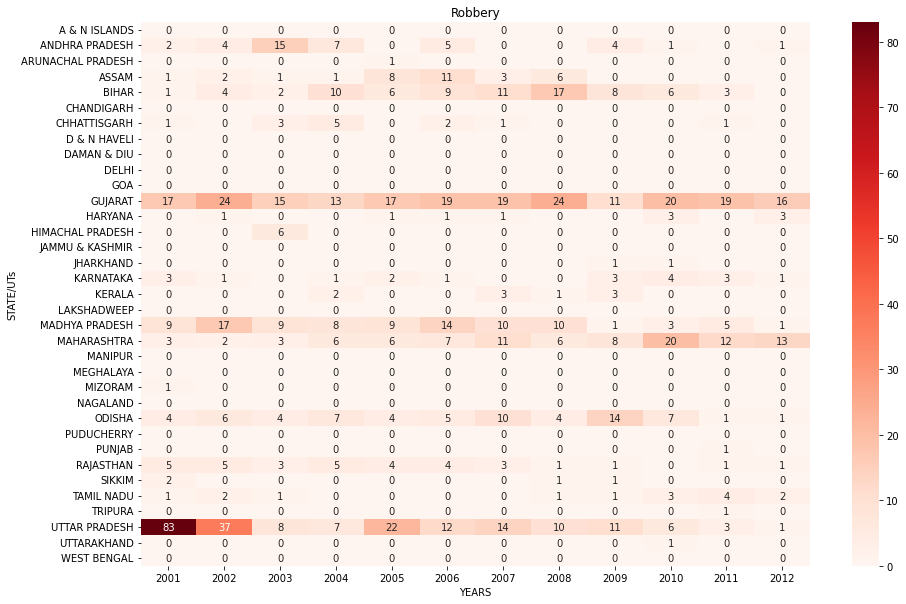

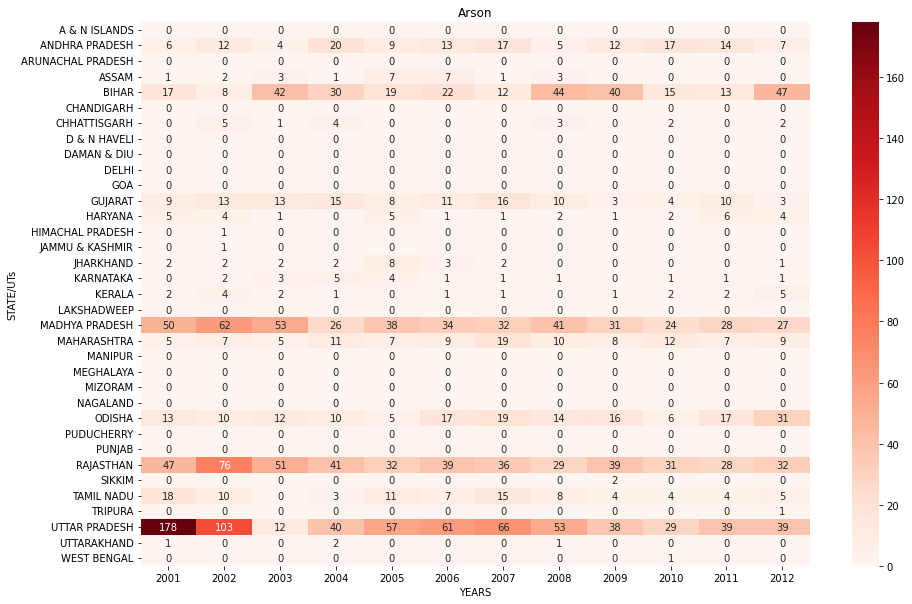

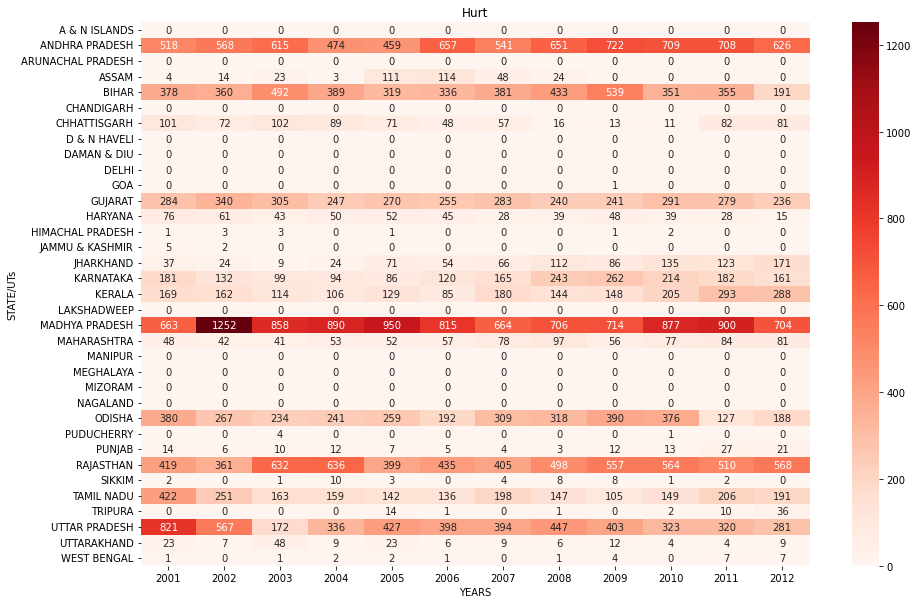

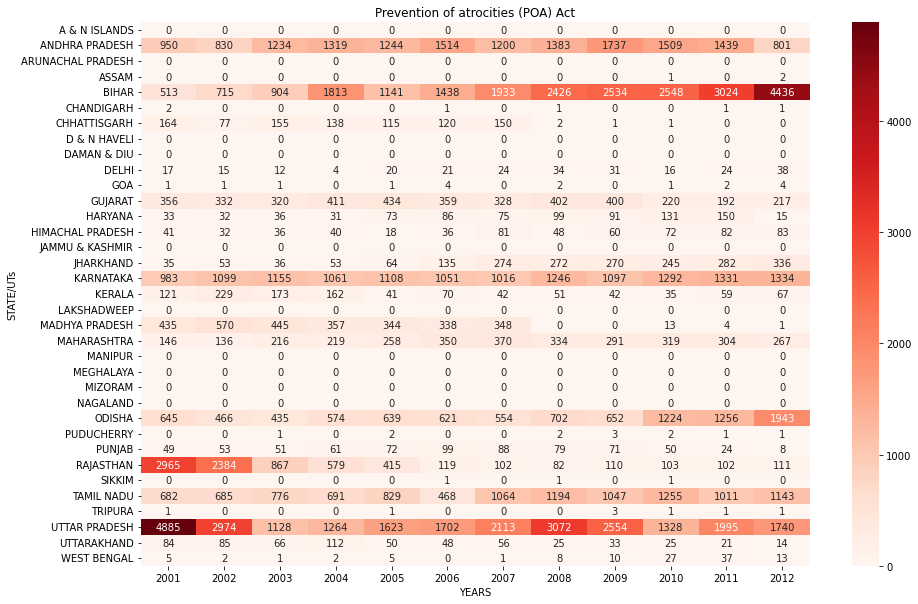

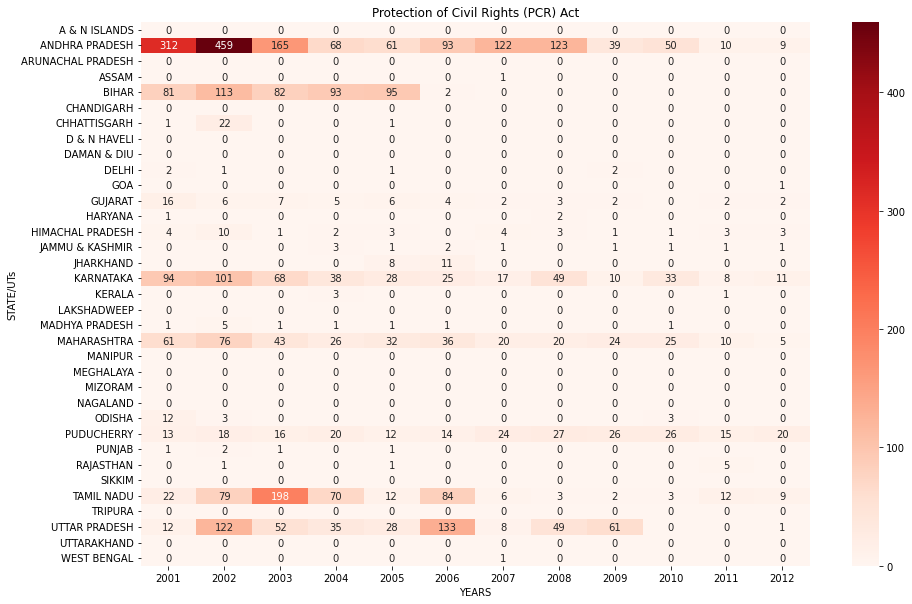

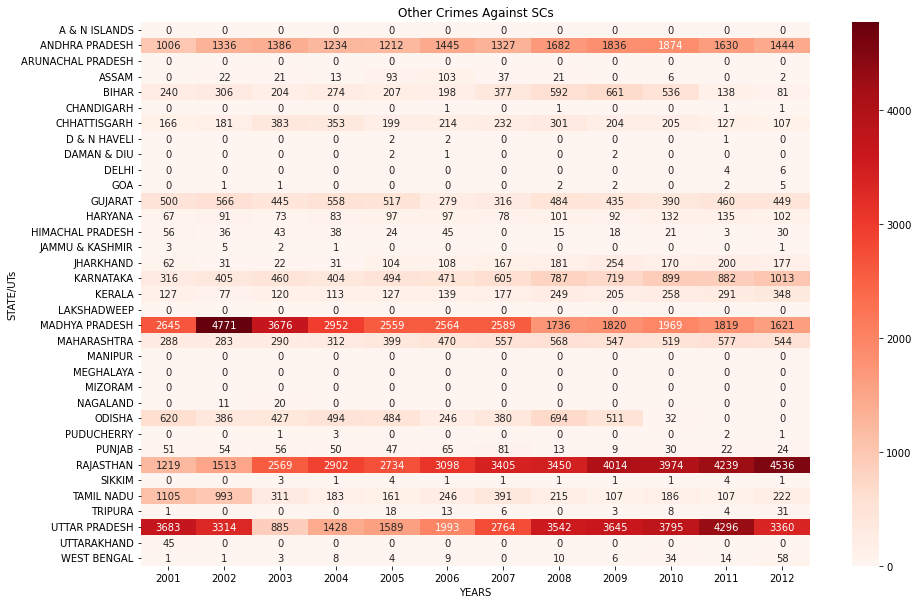

In [25]:
for crime in crime_cols:
    plt.figure(figsize=(15, 10))
    cbs_pivot = cbs[['STATE/UT', 'Year', crime]].pivot_table(values=crime, index='STATE/UT', columns='Year', aggfunc='sum')
    sns.heatmap(cbs_pivot, annot=True, fmt='.0f', cmap='Reds')
    plt.title(crime)
    plt.xlabel('YEARS')
    plt.ylabel('STATE/UTs')
    plt.show()

### Set up data for scatter plots
#### Aggregated crime data by Year

In [26]:
aggregated_dataset_year = cbs.groupby("Year").sum()
aggregated_dataset_year

,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
Year,,,,,,,,,,
2001,763,1316,400,41,133,354,4547,13113,633,12201
2002,739,1331,319,29,105,322,4491,10770,1018,14383
2003,581,1089,232,24,70,204,3969,8048,634,11401
2004,654,1157,253,26,72,211,3824,8891,364,11435
2005,669,1172,258,26,80,210,3847,8497,291,11077
2006,673,1217,280,30,90,226,3760,8581,405,11808
2007,674,1349,332,23,86,238,3814,9819,206,13490
2008,622,1453,477,50,81,224,4134,11465,279,14645
2009,629,1350,511,42,67,195,4322,11037,168,15091


In [27]:
cbs['STATE/UT'] = cbs['STATE/UT'].str.title()
cbs_drop_years = cbs.copy(deep = True).drop(["Year"], axis = 1)
cbs_drop_years.head()

,STATE/UT,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,Andhra Pradesh,45,69,22,3,2,6,518,950,312,1006
1,Andhra Pradesh,60,98,18,0,4,12,568,830,459,1336
2,Andhra Pradesh,33,79,27,1,15,4,615,1234,165,1386
3,Andhra Pradesh,39,66,28,0,7,20,474,1319,68,1234
4,Andhra Pradesh,37,74,21,0,0,9,459,1244,61,1212


#### Aggregated crime data by state

In [28]:
aggregated_dataset_state = cbs_drop_years.groupby("STATE/UT").sum()
aggregated_dataset_state

,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
STATE/UT,,,,,,,,,,
A & N Islands,0,0,0,0,0,0,0,0,0,0
Andhra Pradesh,556,1110,238,9,39,136,7248,15160,1511,17412
Arunachal Pradesh,1,0,0,0,1,0,0,0,0,0
Assam,57,57,96,14,33,25,341,3,1,318
Bihar,286,284,127,29,77,309,4524,23425,466,3814
Chandigarh,0,2,0,0,0,0,0,6,0,4
Chhattisgarh,117,661,43,1,13,17,743,923,24,2672
D & N Haveli,0,0,2,0,0,0,0,0,0,5
Daman & Diu,0,0,0,0,0,0,0,0,0,5


### Scatter plots for states
#### Find out which state had the most number of total cases for each crime

In [29]:
aggregated_dataset_state.idxmax()

Murder                                   Uttar Pradesh
Assault on women                        Madhya Pradesh
Kidnapping and Abduction                 Uttar Pradesh
Dacoity                                    Maharashtra
Robbery                                        Gujarat
Arson                                    Uttar Pradesh
Hurt                                    Madhya Pradesh
Prevention of atrocities (POA) Act       Uttar Pradesh
Protection of Civil Rights (PCR) Act    Andhra Pradesh
Other Crimes Against SCs                     Rajasthan
dtype: object

In [30]:
aggregated_dataset_year.idxmax()

Murder                                  2001
Assault on women                        2012
Kidnapping and Abduction                2011
Dacoity                                 2008
Robbery                                 2001
Arson                                   2001
Hurt                                    2001
Prevention of atrocities (POA) Act      2001
Protection of Civil Rights (PCR) Act    2002
Other Crimes Against SCs                2009
dtype: int64

#### Scatterplot for aggregated crime data for the state "Uttar Pradesh", the crime "Murder" for the years 2001 to 2012

<AxesSubplot:ylabel='Murder'>

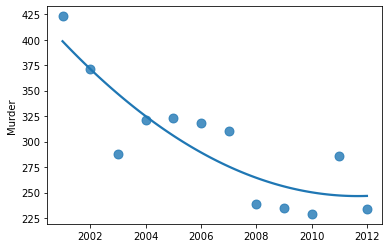

In [31]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = cbs_drop_years[cbs_drop_years
["STATE/UT"] == "Uttar Pradesh"]["Murder"], scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the state "Madhya Pradesh", the crime "Assault on women" for the years 2001 to 2012

<AxesSubplot:ylabel='Assault on women'>

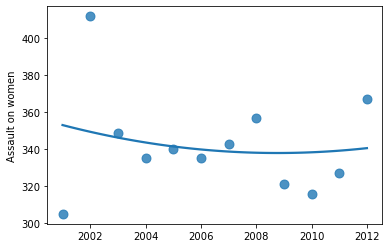

In [32]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = cbs_drop_years[cbs_drop_years
["STATE/UT"] == "Madhya Pradesh"]["Assault on women"], scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the state "Uttar Pradesh", the crime "Kidnapping and Abduction" for the years 2001 to 2012

<AxesSubplot:ylabel='Kidnapping and Abduction'>

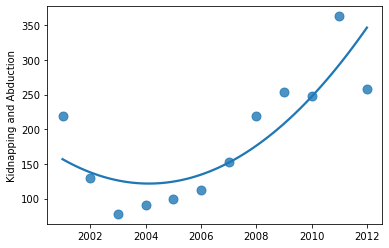

In [33]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = cbs_drop_years[cbs_drop_years
["STATE/UT"] == "Uttar Pradesh"]["Kidnapping and Abduction"], scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the state "Maharashtra", the crime "Dacoity" for the years 2001 to 2012

<AxesSubplot:ylabel='Dacoity'>

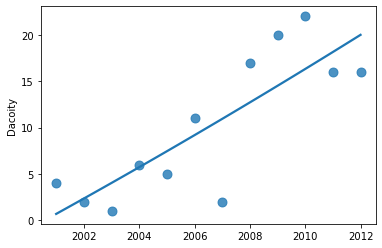

In [34]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = cbs_drop_years[cbs_drop_years
["STATE/UT"] == "Maharashtra"]["Dacoity"], scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the state "Gujarat", the crime "Robbery" for the years 2001 to 2012

<AxesSubplot:ylabel='Robbery'>

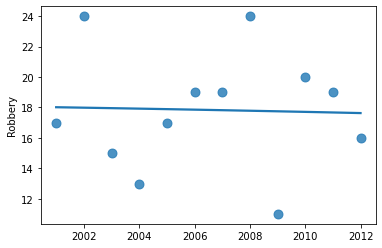

In [35]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = cbs_drop_years[cbs_drop_years
["STATE/UT"] == "Gujarat"]["Robbery"], scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the state "Uttar Pradesh", the crime "Arson" for the years 2001 to 2012

<AxesSubplot:ylabel='Arson'>

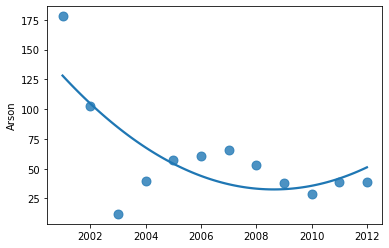

In [36]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = cbs_drop_years[cbs_drop_years
["STATE/UT"] == "Uttar Pradesh"]["Arson"], scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the state "Madhya Pradesh", the crime "Hurt" for the years 2001 to 2012

<AxesSubplot:ylabel='Hurt'>

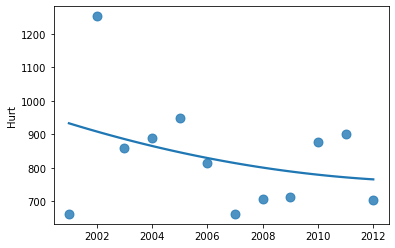

In [37]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = cbs_drop_years[cbs_drop_years
["STATE/UT"] == "Madhya Pradesh"]["Hurt"], scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the state "Uttar Pradesh", the crime "Prevention of atrocities (POA) Act" for the years 2001 to 2012

<AxesSubplot:ylabel='Prevention of atrocities (POA) Act'>

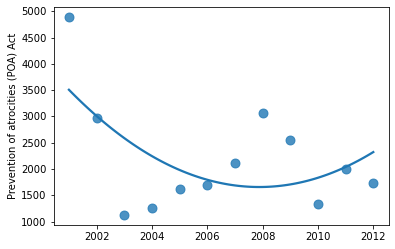

In [38]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = cbs_drop_years[cbs_drop_years
["STATE/UT"] == "Uttar Pradesh"]["Prevention of atrocities (POA) Act"], scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the state "Andhra Pradesh", the crime "Protection of Civil Rights (PCR) Act" for the years 2001 to 2012

<AxesSubplot:ylabel='Protection of Civil Rights (PCR) Act'>

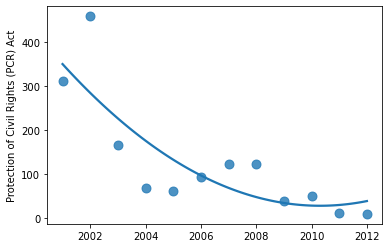

In [39]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = cbs_drop_years[cbs_drop_years
["STATE/UT"] == "Andhra Pradesh"]["Protection of Civil Rights (PCR) Act"], scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the state "Rajasthan", the crime "Other Crimes Against SCs" for the years 2001 to 2012

<AxesSubplot:ylabel='Other Crimes Against SCs'>

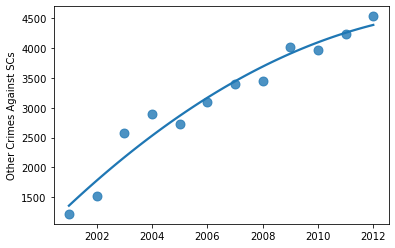

In [40]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = cbs_drop_years[cbs_drop_years
["STATE/UT"] == "Rajasthan"]["Other Crimes Against SCs"], scatter_kws={"s": 80}, order=2, ci=None)

**Scatter plots for entire country**
#### Scatterplot for aggregated crime data for the entire country, the crime "Murder" for the years 2001 to 2012

<AxesSubplot:ylabel='Murder'>

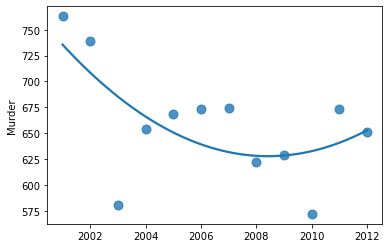

In [41]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = aggregated_dataset_year["Murder"], 
scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the entire country, the crime "Assault on women" for the years 2001 to 2012

<AxesSubplot:ylabel='Assault on women'>

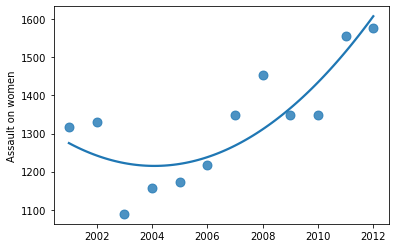

In [42]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = aggregated_dataset_year["Assault on women"], 
scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the entire country, the crime "Kidnapping and Abduction" for the years 2001 to 2012

<AxesSubplot:ylabel='Kidnapping and Abduction'>

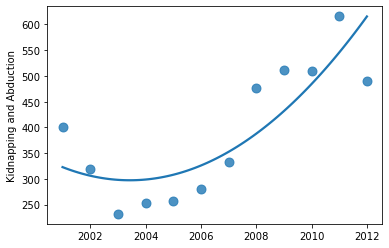

In [43]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = aggregated_dataset_year["Kidnapping and Abduction"], 
scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the entire country, the crime "Dacoity" for the years 2001 to 2012

<AxesSubplot:ylabel='Dacoity'>

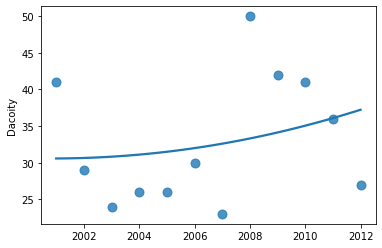

In [44]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = aggregated_dataset_year["Dacoity"], 
scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the entire country, the crime "Robbery" for the years 2001 to 2012

<AxesSubplot:ylabel='Robbery'>

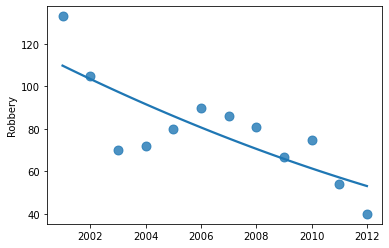

In [45]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = aggregated_dataset_year["Robbery"], 
scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the entire country, the crime "Arson" for the years 2001 to 2012

<AxesSubplot:ylabel='Arson'>

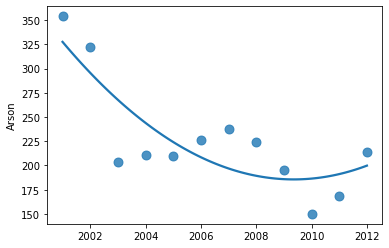

In [46]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = aggregated_dataset_year["Arson"],
scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the entire country, the crime "Hurt" for the years 2001 to 2012

<AxesSubplot:ylabel='Hurt'>

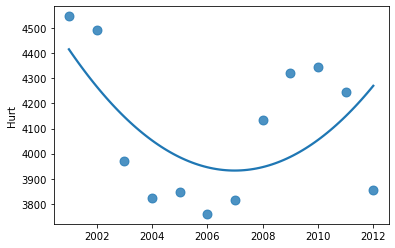

In [47]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = aggregated_dataset_year["Hurt"], 
scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the entire country, the crime "Prevention of atrocities (POA) Act" for the years 2001 to 2012

<AxesSubplot:ylabel='Prevention of atrocities (POA) Act'>

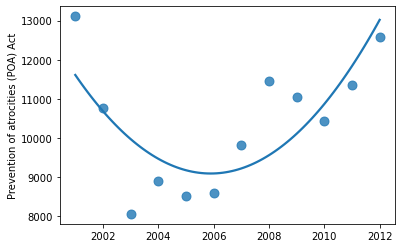

In [48]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = aggregated_dataset_year["Prevention of atrocities (POA) Act"], 
scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the entire country, the crime "Protection of Civil Rights (PCR) Act" for the years 2001 to 2012

<AxesSubplot:ylabel='Protection of Civil Rights (PCR) Act'>

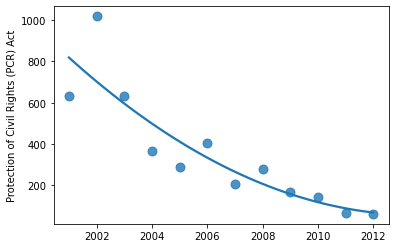

In [49]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = aggregated_dataset_year["Protection of Civil Rights (PCR) Act"], 
scatter_kws={"s": 80}, order=2, ci=None)

#### Scatterplot for aggregated crime data for the entire country, the crime "Other Crimes Against SCs" for the years 2001 to 2012

<AxesSubplot:ylabel='Other Crimes Against SCs'>

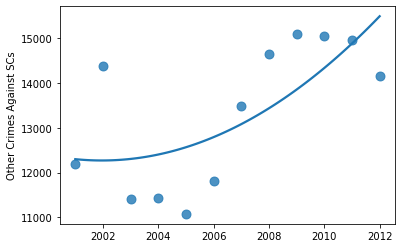

In [50]:
sns.regplot(x = [(x + 1) +  2000 for x in range(12)], y = aggregated_dataset_year["Other Crimes Against SCs"], 
scatter_kws={"s": 80}, order=2, ci=None)

### Find out correlation between columns with a heatmap

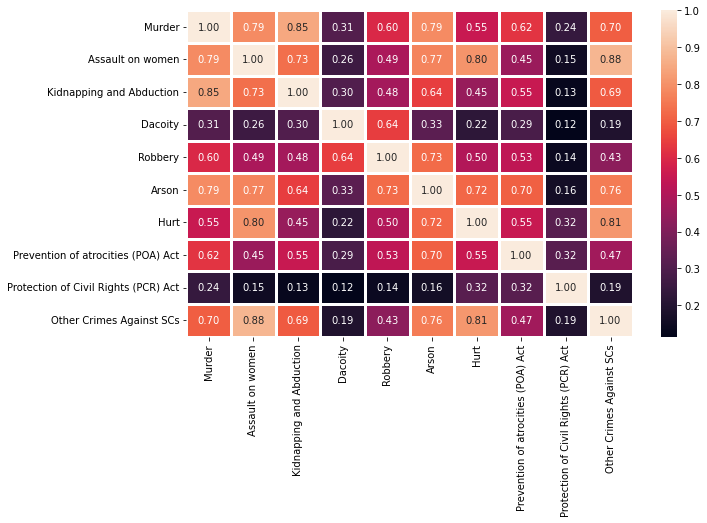

In [51]:
f,ax = plt.subplots(figsize=(10,6))
sns.heatmap(cbs_crimes_only.corr(),annot=True, linewidths=3, fmt='.2f', ax=ax) 
plt.show()

## There is a correlation between the crimes therefore we can make predictions with them

<a id="4"></a> <br>
# 4. Data Visualization for records of district

In [52]:
s = cbd.groupby(['STATE/UT','DISTRICT','Year'])['Murder'].sum().reset_index().sort_values(by='Murder',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,STATE/UT,DISTRICT,Year,Murder
8095,UTTAR PRADESH,BARABANKI,2005,24
8744,UTTAR PRADESH,SITAPUR,2004,22
260,ANDHRA PRADESH,RANGA REDDY,2002,19
8746,UTTAR PRADESH,SITAPUR,2006,18
8349,UTTAR PRADESH,HARDOI,2002,16
8548,UTTAR PRADESH,MAINPURI,2007,16
8450,UTTAR PRADESH,KANPUR NAGAR,2010,16
8470,UTTAR PRADESH,KHIRI,2001,16
8745,UTTAR PRADESH,SITAPUR,2005,16
8791,UTTAR PRADESH,UNNAO,2003,16


The groupby above shows the highest number of murders done in the STATE/UT and DISTRICT column for all the years in the Dataset.

Majority of the 10 highest spots for murder goes to Uttar Pradesh State for a good range of years.

In [53]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Assault on women'].sum().reset_index().sort_values(by='Assault on women',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,STATE/UT,DISTRICT,Year,Assault on women
7293,Rajasthan,ALWAR,2013,38
7309,Rajasthan,GANGANAGAR,2013,33
8747,UTTAR PRADESH,SITAPUR,2007,30
7043,RAJASTHAN,GANGANAGAR,2011,29
8741,UTTAR PRADESH,SITAPUR,2001,28
4935,MADHYA PRADESH,VIDISHA,2003,26
4833,MADHYA PRADESH,SHAJAPUR,2002,26
7310,Rajasthan,HANUMANGARH,2013,26
4939,MADHYA PRADESH,VIDISHA,2007,26
4749,MADHYA PRADESH,RAJGARH,2002,25


The groupby above shows the highest number of Assault on women done in the STATE/UT and DISTRICT column for all the years in the Dataset.

Here Assault is highest in Rajasthan with 4 spots taken by Rajasthan in the top 10.

In [54]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Kidnapping and Abduction'].sum().reset_index().sort_values(by='Kidnapping and Abduction',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,STATE/UT,DISTRICT,Year,Kidnapping and Abduction
8448,UTTAR PRADESH,KANPUR NAGAR,2008,23
7957,UTTAR PRADESH,AGRA,2011,23
8450,UTTAR PRADESH,KANPUR NAGAR,2010,22
8449,UTTAR PRADESH,KANPUR NAGAR,2009,21
8984,Uttar Pradesh,BAREILLY,2013,19
8114,UTTAR PRADESH,BAREILLY,2012,19
8588,UTTAR PRADESH,MEERUT,2011,17
7981,UTTAR PRADESH,ALLAHABAD,2011,17
8451,UTTAR PRADESH,KANPUR NAGAR,2011,17
8452,UTTAR PRADESH,KANPUR NAGAR,2012,16


The groupby above shows the highest number of Kidnapping and Abduction done in the STATE/UT and DISTRICT column for all the years in the Dataset.

Uttar Pradesh takes all the 10 spots for highest number of Crimes in this case which is a high number from the year 2008 and so on.

In [55]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Dacoity'].sum().reset_index().sort_values(by='Dacoity',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,STATE/UT,DISTRICT,Year,Dacoity
2208,GUJARAT,DAHOD,2002,9
2207,GUJARAT,DAHOD,2001,6
2830,HIMACHAL PRADESH,HAMIRPUR,2003,6
6146,ODISHA,DCP CTC,2008,6
2130,GUJARAT,AHMEDABAD COMMR.,2011,5
2209,GUJARAT,DAHOD,2003,5
3390,JHARKHAND,GARHWA,2010,4
6147,ODISHA,DCP CTC,2009,4
1153,BIHAR,GAYA,2008,4
5304,MAHARASHTRA,PARBHANI,2012,4


The groupby above shows the highest number of Dacoity cases in the STATE/UT and DISTRICT column for all the years in the Dataset.

This is a fairly low number and as the years have progressed the cases have decreased constantly.

In [56]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Robbery'].sum().reset_index().sort_values(by='Robbery',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,STATE/UT,DISTRICT,Year,Robbery
300,ANDHRA PRADESH,VIJAYAWADA,2003,14
2208,GUJARAT,DAHOD,2002,12
8095,UTTAR PRADESH,BARABANKI,2005,11
4561,MADHYA PRADESH,HOSHANGABAD,2006,9
2209,GUJARAT,DAHOD,2003,8
2207,GUJARAT,DAHOD,2001,8
1149,BIHAR,GAYA,2004,8
2262,GUJARAT,JUNAGADH,2008,8
1152,BIHAR,GAYA,2007,8
6111,ODISHA,BOLANGIR,2007,8


The groupby above shows the highest number of Robberies done in the STATE/UT and DISTRICT column for all the years in the Dataset.

This has also decreased fairly as years have progressed.

In [57]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Arson'].sum().reset_index().sort_values(by='Arson',ascending=False)
s.head(10).style.background_gradient(cmap='RdPu')

,STATE/UT,DISTRICT,Year,Arson
1418,BIHAR,ROHTAS,2009,28
1417,BIHAR,ROHTAS,2008,25
1448,BIHAR,SARAN,2003,20
8747,UTTAR PRADESH,SITAPUR,2007,13
7546,TAMIL NADU,MADURAI RURAL,2007,12
6911,RAJASTHAN,BHARATPUR,2002,12
1005,BIHAR,ARARIA,2004,12
8741,UTTAR PRADESH,SITAPUR,2001,10
6873,RAJASTHAN,ALWAR,2012,10
8091,UTTAR PRADESH,BARABANKI,2001,10


The groupby above shows the highest number of Arson cases in the STATE/UT and DISTRICT column for all the years in the Dataset.

Bihar had the highest number of cases for two consecutive years in the same district.

In [58]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Hurt'].sum().reset_index().sort_values(by='Hurt',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,STATE/UT,DISTRICT,Year,Hurt
7720,TAMIL NADU,THIRUVALLUR,2001,273
4437,MADHYA PRADESH,CHHATARPUR,2002,208
7142,RAJASTHAN,JODHPUR,2003,207
138,ANDHRA PRADESH,KARIMNAGAR,2003,196
6981,RAJASTHAN,CHURU,2012,159
4443,MADHYA PRADESH,CHHATARPUR,2008,150
4881,MADHYA PRADESH,SIHORE,2002,149
298,ANDHRA PRADESH,VIJAYAWADA,2001,146
6980,RAJASTHAN,CHURU,2011,142
7302,Rajasthan,CHURU,2013,142


In [59]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Prevention of atrocities (POA) Act'].sum().reset_index().sort_values(by='Prevention of atrocities (POA) Act',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,STATE/UT,DISTRICT,Year,Prevention of atrocities (POA) Act
6910,RAJASTHAN,BHARATPUR,2001,428
1521,BIHAR,VAISHALI,2004,426
1542,Bihar,GAYA,2013,372
1561,Bihar,PATNA,2013,357
1556,Bihar,MUZAFFARPUR,2013,352
1554,Bihar,MOTIHARI,2013,312
1535,Bihar,BEGUSARAI,2013,311
1145,BIHAR,DARBHANGA,2012,296
6911,RAJASTHAN,BHARATPUR,2002,292
7057,RAJASTHAN,JAIPUR,2001,270


The groupby above shows the highest number of Atrocities cases in the STATE/UT and DISTRICT column for all the years in the Dataset.

Bihar and Rajasthan are the states which are most affected here at a high number.

In [60]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Protection of Civil Rights (PCR) Act'].sum().reset_index().sort_values(by='Protection of Civil Rights (PCR) Act',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,STATE/UT,DISTRICT,Year,Protection of Civil Rights (PCR) Act
161,ANDHRA PRADESH,KRISHNA,2002,153
7394,TAMIL NADU,CHENGAI,2003,149
160,ANDHRA PRADESH,KRISHNA,2001,79
1279,BIHAR,MADHUBANI,2002,71
87,ANDHRA PRADESH,EAST GODAVARI,2003,67
85,ANDHRA PRADESH,EAST GODAVARI,2001,63
8574,UTTAR PRADESH,MAU,2009,60
7673,TAMIL NADU,THANJAVUR,2002,56
86,ANDHRA PRADESH,EAST GODAVARI,2002,52
7675,TAMIL NADU,THANJAVUR,2004,50


The groupby above shows the highest number of Civil rights infringement done in the STATE/UT and DISTRICT column for all the years in the Dataset.

Most of the cases are from Andhra Pradesh and Tamil Nadu in the initial years which have decreased over the years.

In [61]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Other Crimes Against SCs'].sum().reset_index().sort_values(by='Other Crimes Against SCs',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,STATE/UT,DISTRICT,Year,Other Crimes Against SCs
7720,TAMIL NADU,THIRUVALLUR,2001,819
7721,TAMIL NADU,THIRUVALLUR,2002,723
7293,Rajasthan,ALWAR,2013,549
6920,RAJASTHAN,BHARATPUR,2011,482
7297,Rajasthan,BHARATPUR,2013,467
6921,RAJASTHAN,BHARATPUR,2012,443
6918,RAJASTHAN,BHARATPUR,2009,441
6919,RAJASTHAN,BHARATPUR,2010,437
4912,MADHYA PRADESH,UJJAIN,2004,428
6917,RAJASTHAN,BHARATPUR,2008,416


The groupby above shows the highest number of Crimes against SCs done in the STATE/UT and DISTRICT column for all the years in the Dataset.

Tamil Nadu had consecutively the highest number of cases for the initial years which then dissipated later on. Rajasthan then took the lead for highest number of cases consecutively for 4 years.

#### This adds total atrocities in the state and makes a new coloumn added to the CBSR dataset.

In [64]:
cbd['Total Atrocities'] = cbd['Murder'] + cbd['Assault on women'] + cbd['Kidnapping and Abduction'] + cbd['Dacoity'] + cbd['Robbery']+cbd['Arson']+cbd['Hurt']+cbd['Prevention of atrocities (POA) Act']+cbd['Protection of Civil Rights (PCR) Act']+cbd['Other Crimes Against SCs']

In [63]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Total Atrocities'].sum().reset_index().sort_values(by='Total Atrocities',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,STATE/UT,DISTRICT,Year,Total Atrocities
7720,TAMIL NADU,THIRUVALLUR,2001,1143
7721,TAMIL NADU,THIRUVALLUR,2002,879
1561,Bihar,PATNA,2013,714
7293,Rajasthan,ALWAR,2013,608
138,ANDHRA PRADESH,KARIMNAGAR,2003,554
381,ANDHRA PRADESH,WEST GODAVARI,2009,534
137,ANDHRA PRADESH,KARIMNAGAR,2002,520
6920,RAJASTHAN,BHARATPUR,2011,511
4912,MADHYA PRADESH,UJJAIN,2004,506
7297,Rajasthan,BHARATPUR,2013,489


Tamil Nadu had the highest Hate Crime in the initial years which decreased a lot in the progressive years. Bihar and Rajasthan then had the highest number of cases followed by Andhra Pradesh.

<a id="5"></a> <br>
# 5. Data Visualization for records of state

#### This adds total atrocities in the state and makes a new coloumn added to the CBS dataset.

In [65]:
cbs['Total Atrocities'] = cbs['Murder'] + cbs['Assault on women'] + cbs['Kidnapping and Abduction'] + cbs['Dacoity'] + cbs['Robbery'] + cbs['Arson'] + cbs['Hurt'] + cbs['Prevention of atrocities (POA) Act'] + cbs['Protection of Civil Rights (PCR) Act'] + cbs['Other Crimes Against SCs']

In [66]:
s= cbs.groupby(['STATE/UT','Year'])['Murder'].sum().reset_index().sort_values(by='Murder',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,STATE/UT,Year,Murder
384,Uttar Pradesh,2001,423
385,Uttar Pradesh,2002,371
388,Uttar Pradesh,2005,323
387,Uttar Pradesh,2004,321
389,Uttar Pradesh,2006,318
390,Uttar Pradesh,2007,310
386,Uttar Pradesh,2003,288
394,Uttar Pradesh,2011,286
391,Uttar Pradesh,2008,239
392,Uttar Pradesh,2009,235


The highest number of murders are in Uttar Pradesh for the successive years.

In [67]:
s= cbs.groupby(['STATE/UT','Year'])['Assault on women'].sum().reset_index().sort_values(by='Assault on women',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,STATE/UT,Year,Assault on women
229,Madhya Pradesh,2002,412
384,Uttar Pradesh,2001,412
394,Uttar Pradesh,2011,397
391,Uttar Pradesh,2008,375
239,Madhya Pradesh,2012,367
235,Madhya Pradesh,2008,357
230,Madhya Pradesh,2003,349
234,Madhya Pradesh,2007,343
232,Madhya Pradesh,2005,340
231,Madhya Pradesh,2004,335


Assault on women are having high cases in the state of Madhya Pradesh and Uttar Pradesh.

In [68]:
s= cbs.groupby(['STATE/UT','Year'])['Kidnapping and Abduction'].sum().reset_index().sort_values(by='Kidnapping and Abduction',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,STATE/UT,Year,Kidnapping and Abduction
394,Uttar Pradesh,2011,363
395,Uttar Pradesh,2012,258
392,Uttar Pradesh,2009,254
393,Uttar Pradesh,2010,248
384,Uttar Pradesh,2001,219
391,Uttar Pradesh,2008,219
390,Uttar Pradesh,2007,153
385,Uttar Pradesh,2002,130
389,Uttar Pradesh,2006,113
388,Uttar Pradesh,2005,99


Kidnapping and Abduction are all prevalent in Uttar Pradesh for the successive years.

In [69]:
s= cbs.groupby(['STATE/UT','Year'])['Dacoity'].sum().reset_index().sort_values(by='Dacoity',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,STATE/UT,Year,Dacoity
249,Maharashtra,2010,22
248,Maharashtra,2009,20
247,Maharashtra,2008,17
384,Uttar Pradesh,2001,16
251,Maharashtra,2012,16
250,Maharashtra,2011,16
133,Gujarat,2002,11
245,Maharashtra,2006,11
142,Gujarat,2011,9
158,Himachal Pradesh,2003,8


Dacoity is prevalent in Maharasthra which is highest during 2008-2010.

In [70]:
s= cbs.groupby(['STATE/UT','Year'])['Robbery'].sum().reset_index().sort_values(by='Robbery',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,STATE/UT,Year,Robbery
384,Uttar Pradesh,2001,83
385,Uttar Pradesh,2002,37
133,Gujarat,2002,24
139,Gujarat,2008,24
388,Uttar Pradesh,2005,22
141,Gujarat,2010,20
249,Maharashtra,2010,20
137,Gujarat,2006,19
138,Gujarat,2007,19
142,Gujarat,2011,19


Robbery had high cases in 2001 and then it went down to almost half of the original number. It has then successively fallen.

In [71]:
s= cbs.groupby(['STATE/UT','Year'])['Arson'].sum().reset_index().sort_values(by='Arson',ascending=False)
s.head(10).style.background_gradient(cmap='RdPu')

,STATE/UT,Year,Arson
384,Uttar Pradesh,2001,178
385,Uttar Pradesh,2002,103
337,Rajasthan,2002,76
390,Uttar Pradesh,2007,66
229,Madhya Pradesh,2002,62
389,Uttar Pradesh,2006,61
388,Uttar Pradesh,2005,57
230,Madhya Pradesh,2003,53
391,Uttar Pradesh,2008,53
338,Rajasthan,2003,51


Arson cases were high initially which then decreased over the years. However, Uttar Pradesh state had quite a number for the years.

In [72]:
s = cbs.groupby(['STATE/UT','Year'])['Hurt'].sum().reset_index().sort_values(by='Hurt',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,STATE/UT,Year,Hurt
229,Madhya Pradesh,2002,1252
232,Madhya Pradesh,2005,950
238,Madhya Pradesh,2011,900
231,Madhya Pradesh,2004,890
237,Madhya Pradesh,2010,877
230,Madhya Pradesh,2003,858
384,Uttar Pradesh,2001,821
233,Madhya Pradesh,2006,815
20,Andhra Pradesh,2009,722
236,Madhya Pradesh,2009,714


Cases of attack have been most in Madhy Pradesh which is high for a lot of the years.

In [73]:
s= cbs.groupby(['STATE/UT','Year'])['Prevention of atrocities (POA) Act'].sum().reset_index().sort_values(by='Prevention of atrocities (POA) Act',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,STATE/UT,Year,Prevention of atrocities (POA) Act
384,Uttar Pradesh,2001,4885
59,Bihar,2012,4436
391,Uttar Pradesh,2008,3072
58,Bihar,2011,3024
385,Uttar Pradesh,2002,2974
336,Rajasthan,2001,2965
392,Uttar Pradesh,2009,2554
57,Bihar,2010,2548
56,Bihar,2009,2534
55,Bihar,2008,2426


Prevention of attrocities were highest in initial years which decreased over the progressive years but in 2012 it almost reached the same number as 2001.

In [74]:
s= cbs.groupby(['STATE/UT','Year'])['Protection of Civil Rights (PCR) Act'].sum().reset_index().sort_values(by='Protection of Civil Rights (PCR) Act',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,STATE/UT,Year,Protection of Civil Rights (PCR) Act
13,Andhra Pradesh,2002,459
12,Andhra Pradesh,2001,312
362,Tamil Nadu,2003,198
14,Andhra Pradesh,2003,165
389,Uttar Pradesh,2006,133
19,Andhra Pradesh,2008,123
18,Andhra Pradesh,2007,122
385,Uttar Pradesh,2002,122
49,Bihar,2002,113
193,Karnataka,2002,101


PCR was high initially for Andhra Pradesh and it decreased over the years showing a good effect of authorities.

In [75]:
s= cbs.groupby(['STATE/UT','Year'])['Other Crimes Against SCs'].sum().reset_index().sort_values(by='Other Crimes Against SCs',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,STATE/UT,Year,Other Crimes Against SCs
229,Madhya Pradesh,2002,4771
347,Rajasthan,2012,4536
394,Uttar Pradesh,2011,4296
346,Rajasthan,2011,4239
344,Rajasthan,2009,4014
345,Rajasthan,2010,3974
393,Uttar Pradesh,2010,3795
384,Uttar Pradesh,2001,3683
230,Madhya Pradesh,2003,3676
392,Uttar Pradesh,2009,3645


Discriminatory crimes have maintained a constant rate over the years and has not dropped much.

In [76]:
s= cbs.groupby(['STATE/UT','Year'])['Total Atrocities'].sum().reset_index().sort_values(by='Total Atrocities',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,STATE/UT,Year,Total Atrocities
384,Uttar Pradesh,2001,10732
391,Uttar Pradesh,2008,8009
385,Uttar Pradesh,2002,7927
394,Uttar Pradesh,2011,7702
392,Uttar Pradesh,2009,7522
229,Madhya Pradesh,2002,7217
393,Uttar Pradesh,2010,6272
395,Uttar Pradesh,2012,6202
390,Uttar Pradesh,2007,6144
347,Rajasthan,2012,5559


Total number of Hate Crime are maximum in Uttar Pradesh which hasn't gone down a bit over the years.

<a id="6"></a> <br>
# 6. KNN Classification 

**I am classifying the states on the basis of total number of crimes happened between 2001 to 2012 against the marginalised community into four categories i.e, 1.LEAST VOILENT 2.MODERATE VOILENT 3.MOST VOILENT 4.EXTREME VOILENT**

In [77]:
state_cond = dict()
total_crime = cbs
total_crime_list = np.array(total_crime['Total Atrocities'])
for num in total_crime_list:
    if (num >= 0 and num <= 360): 
        state_cond[num] = 0
    elif (num > 360  and num <= 2400):
        state_cond[num] = 1
    elif (num > 2400  and num <= 3600):
        state_cond[num] = 2
    else:
        state_cond[num] = 3

In [78]:
temp = list()
for num in total_crime_list:
    temp.append(state_cond[num])
temp
target = np.array(temp)
target_names = np.array(['least voilent','moderate voilent','most voilent','extreme voilent'])

In [79]:
target

array([2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 3,
       3, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,

In [80]:
target_names

array(['least voilent', 'moderate voilent', 'most voilent',
       'extreme voilent'], dtype='<U16')

In [81]:
total_crime['Target'] = target
total_crime

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total Atrocities,Target
0,Andhra Pradesh,2001,45,69,22,3,2,6,518,950,312,1006,2933,2
1,Andhra Pradesh,2002,60,98,18,0,4,12,568,830,459,1336,3385,2
2,Andhra Pradesh,2003,33,79,27,1,15,4,615,1234,165,1386,3559,2
3,Andhra Pradesh,2004,39,66,28,0,7,20,474,1319,68,1234,3255,2
4,Andhra Pradesh,2005,37,74,21,0,0,9,459,1244,61,1212,3117,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,Puducherry,2008,0,0,0,0,0,0,0,2,27,0,29,0
416,Puducherry,2009,0,0,0,0,0,0,0,3,26,0,29,0
417,Puducherry,2010,1,0,1,0,0,0,1,2,26,0,31,0
418,Puducherry,2011,0,0,0,0,0,0,0,1,15,2,18,0


In [82]:
from sklearn.model_selection import train_test_split
X = total_crime[['Year','Murder','Assault on women','Kidnapping and Abduction','Dacoity','Robbery','Arson','Hurt','Prevention of atrocities (POA) Act','Protection of Civil Rights (PCR) Act','Other Crimes Against SCs']]
y = total_crime['Target']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [84]:
len(X_train)

336

In [85]:
len(X_test)

84

In [86]:
X_test

,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
264,2001,0,0,2,0,2,0,2,0,0,0
41,2006,16,19,2,1,9,22,336,1438,2,198
190,2011,0,0,0,0,0,0,0,0,0,0
265,2002,0,1,0,0,0,0,0,0,0,0
332,2009,0,0,1,0,0,0,4,10,0,6
...,...,...,...,...,...,...,...,...,...,...,...
80,2009,20,28,34,8,11,3,241,400,2,435
69,2010,0,0,0,0,0,0,0,1,0,0
330,2007,1,1,0,0,0,0,0,1,1,0
298,2011,1,2,3,0,1,0,10,1,0,4


In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [88]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [89]:
knn.score(X_test,y_test)

0.9523809523809523

In [90]:
knn.predict([[2009,88,367,64,2,1,27,704,1,0,1621]])

array([2])

## Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[54,  0,  0,  0],
       [ 1, 16,  0,  0],
       [ 0,  3,  3,  0],
       [ 0,  0,  0,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

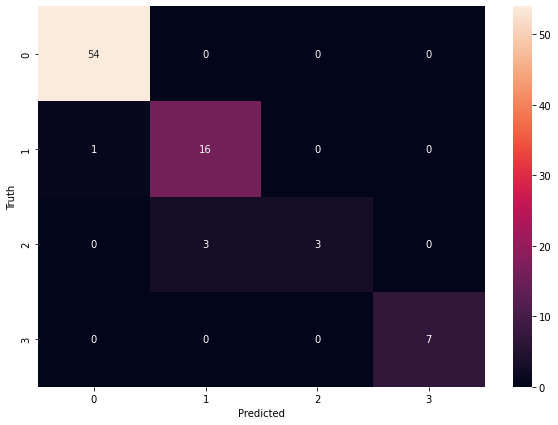

In [92]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<a id="7"></a> <br>
# 7. CONCLUSION

### We have extracted a lot of insights from the datasets

**Such as**
1. UP,MP,RAJASTHAN,BIHAR,AP,GUJRAT,TAMILNADU,ODISSA and KARNATAKA were the worst state in terms of crimes against SCs during the period of 2001-2012.
2. We can get the idea of worst states crime wise also :
    - UP had seen most number of Murders and Arson.(Which also gradually decreases over the years)
    - MP and UP were worst in terms of assault on women.
    - Kidnapping and abduction was most in UP.
    - Dacoity was most common in MAHARASHTRA.
    - Robbery was most common in GUJRAT.
    - MP had the most number of hurt people.
    - UP and Bihar have registered most cases of Prevention of Atrocities (POA) act-(UP had the most cases in early years and gradually decreases whereas Bihar had least cases in th early year and gradually increases).
    - ANDHRA PRADESH have registered most cases of Protection of Civil Rights (PCR) act.
    - RAJASTHAN was considered to be worst state in terms of others crimes against SCs.
3. Overall the percentage of voilent crimes against SCs have followed a downward trend but it is still significant enough to take into consideration.
4. We have charts of trends of worst performing states in comparision to the country.
5. We have correlation between crimes which is useful for more further predictions.
6. Similar to Point NO.2 we have insights about the worst districts in those states as well.
7. I have finally done classification of states in four categories on the basis of total number of crimes happened in a state in a particular year using KNN classification:
    - Least Voilent
    - Moderate Voilent
    - Most Voilent
    - Extreme Voilent
8. You can predict any state is voilent or not on the basis of number of crimes occured in that year using the classification model.

# THANK YOU !